In [1]:
# Download the daily data (from 11/11/2019 to 13/Nov/2020) for the S&P 500 from Yahoo Finance by using yfinance package. Get the spot price of the Index.

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as si
import os

In [2]:
SP_500 = yf.download("^GSPC", start = "2019-11-11", end = "2020-11-13")

[*********************100%***********************]  1 of 1 completed


In [3]:
SP_500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-11,3080.330078,3088.330078,3075.820068,3087.010010,3087.010010,3035530000
2019-11-12,3089.280029,3102.610107,3084.729980,3091.840088,3091.840088,3466010000
2019-11-13,3084.179932,3098.060059,3078.800049,3094.040039,3094.040039,3509280000
2019-11-14,3090.750000,3098.199951,3083.260010,3096.629883,3096.629883,3276070000
2019-11-15,3107.919922,3120.459961,3104.600098,3120.459961,3120.459961,3335650000


In [4]:
SP_500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-06,3508.340088,3521.580078,3484.340088,3509.439941,3509.439941,4833950000
2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,3550.500000,8556610000
2020-11-10,3543.260010,3557.219971,3511.909912,3545.530029,3545.530029,6024230000
2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000
2020-11-12,3562.669922,3569.020020,3518.580078,3537.010010,3537.010010,4890120000


In [5]:
SPOT = SP_500['Adj Close'][-1]
print("Spot price is", SPOT)

Spot price is 3537.010009765625


In [6]:
# Calibrate the annualised volatility of the Index. Compare it with the VIX data.

log_return = np.log(SP_500['Adj Close'] / SP_500['Adj Close'].shift(1)) # alternative to using pandas
log_return[:5]

Date
2019-11-11         NaN
2019-11-12    0.001563
2019-11-13    0.000711
2019-11-14    0.000837
2019-11-15    0.007666
Name: Adj Close, dtype: float64

In [7]:
sigma = np.sqrt(252) * log_return.std()
print("The annualized volatility is", (sigma*100), "%")

The annualized volatility is 34.49854894209453 %


In [8]:
VIX = yf.download("^VIX", start = "2019-11-11", end = "2020-11-13")

[*********************100%***********************]  1 of 1 completed


In [9]:
VIX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-11,13.15,13.49,12.66,12.69,12.69,0
2019-11-12,12.64,13.10,12.36,12.68,12.68,0
2019-11-13,12.91,13.90,12.88,13.00,13.00,0
2019-11-14,13.16,13.81,12.93,13.05,13.05,0
2019-11-15,12.95,12.97,11.92,12.05,12.05,0


In [10]:
VIXvol = VIX['Adj Close'][-1]
print('The market volatility is', VIXvol, '%')

The market volatility is 25.350000381469727 %


In [31]:
# Find the call and put option price with Strike at 4000 and Expiry date on 18/12/2020.
    
def euro_option_bs(S, K, T, r, sigma, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [32]:
SP_500_call = euro_option_bs(3537, 4000, 5/52, 0.162, 0.34, "call")
print(SP_500_call)

31.582860190560154


In [33]:
SP_500_put = euro_option_bs(3537, 4000, 5/52, 0.162, 0.34, "put")
print(SP_500_put)

432.7579390012638


In [34]:
# Find the call and put option price with Strike at 4000 and Expiry date on 17/12/2021. Compare the value with the market price.
# ttm is 1 year and 5 weeks 

SP_500_call = euro_option_bs(3537, 4000, 1.096, 0.162, 0.34, "call")
print(SP_500_call)

585.8639288715133


In [35]:
SP_500_put = euro_option_bs(3537, 4000, 1.096, 0.162, 0.34, "put")
print(SP_500_put)

398.13375965503724


In [36]:
SP_500 = yf.Ticker("^GSPC")
options = SP_500.option_chain("2021-12-17")
market_call_price = options.calls.lastPrice[options.calls.strike == 4000]
print("Market call price is", float(market_call_price.values))

Market call price is 206.8


In [37]:
market_put_price = options.puts.lastPrice[options.puts.strike == 4000]
print("Market put price is", float(market_put_price.values))

Market put price is 318.61


In [38]:
# If we use the VIX as volatility, what is the results for Q3 and Q4? Which one is closer to the market price?

call_VIX = euro_option_bs(3537, 4000, 1.096, 0.162, 0.25, "call")
print(call_VIX)

460.0583400712351


In [39]:
put_VIX = euro_option_bs(3537, 4000, 1.096, 0.162, 0.25, "put")
print(put_VIX)

272.3281708547586


In [ ]:
# dates requested are year old so prices will differ now; consider using more recent data

In [40]:
# Set the Strike from $3000 to 4000 (every $100), and Time is one week, two weeks, one month, two months, one quarter, half year and one year. Set volatility equals to the VIX value. Plot the call price 3D surface.

K = np.linspace(3000,4000,11)
T = [1/52, 2/52, 1/12, 2/12, 1/4, 1/2, 1]

In [42]:
call_price = np.zeros((len(T),len(K)))
for i in range(len(T)):
    for j in range(len(K)):
        call_price[i,j] = euro_option_bs(3537, K[j], T[i], 0.162, 0.25, "call")

In [43]:
Strike, TTM = np.meshgrid(K, T)

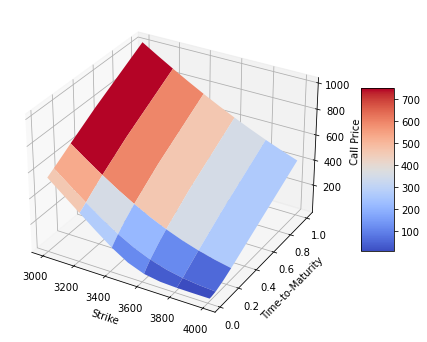

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Strike, TTM, call_price, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Call Price')
fig.colorbar(surf, shrink=0.5, aspect=5);